#  Linear Regression

Linear Regression is simplest form of model used for supervised learning in Machine Learning world. In other words, this model is used for the predictive analysis to determine how the predicted variables are good and precise and how the input vairables best estimate the output variable.

In this notebook, I will demonstrate the math behind fitting the line as best location as possible by using few tricks.

First is the **_Absolute Trick_** :

## 1. Absolute Trick:

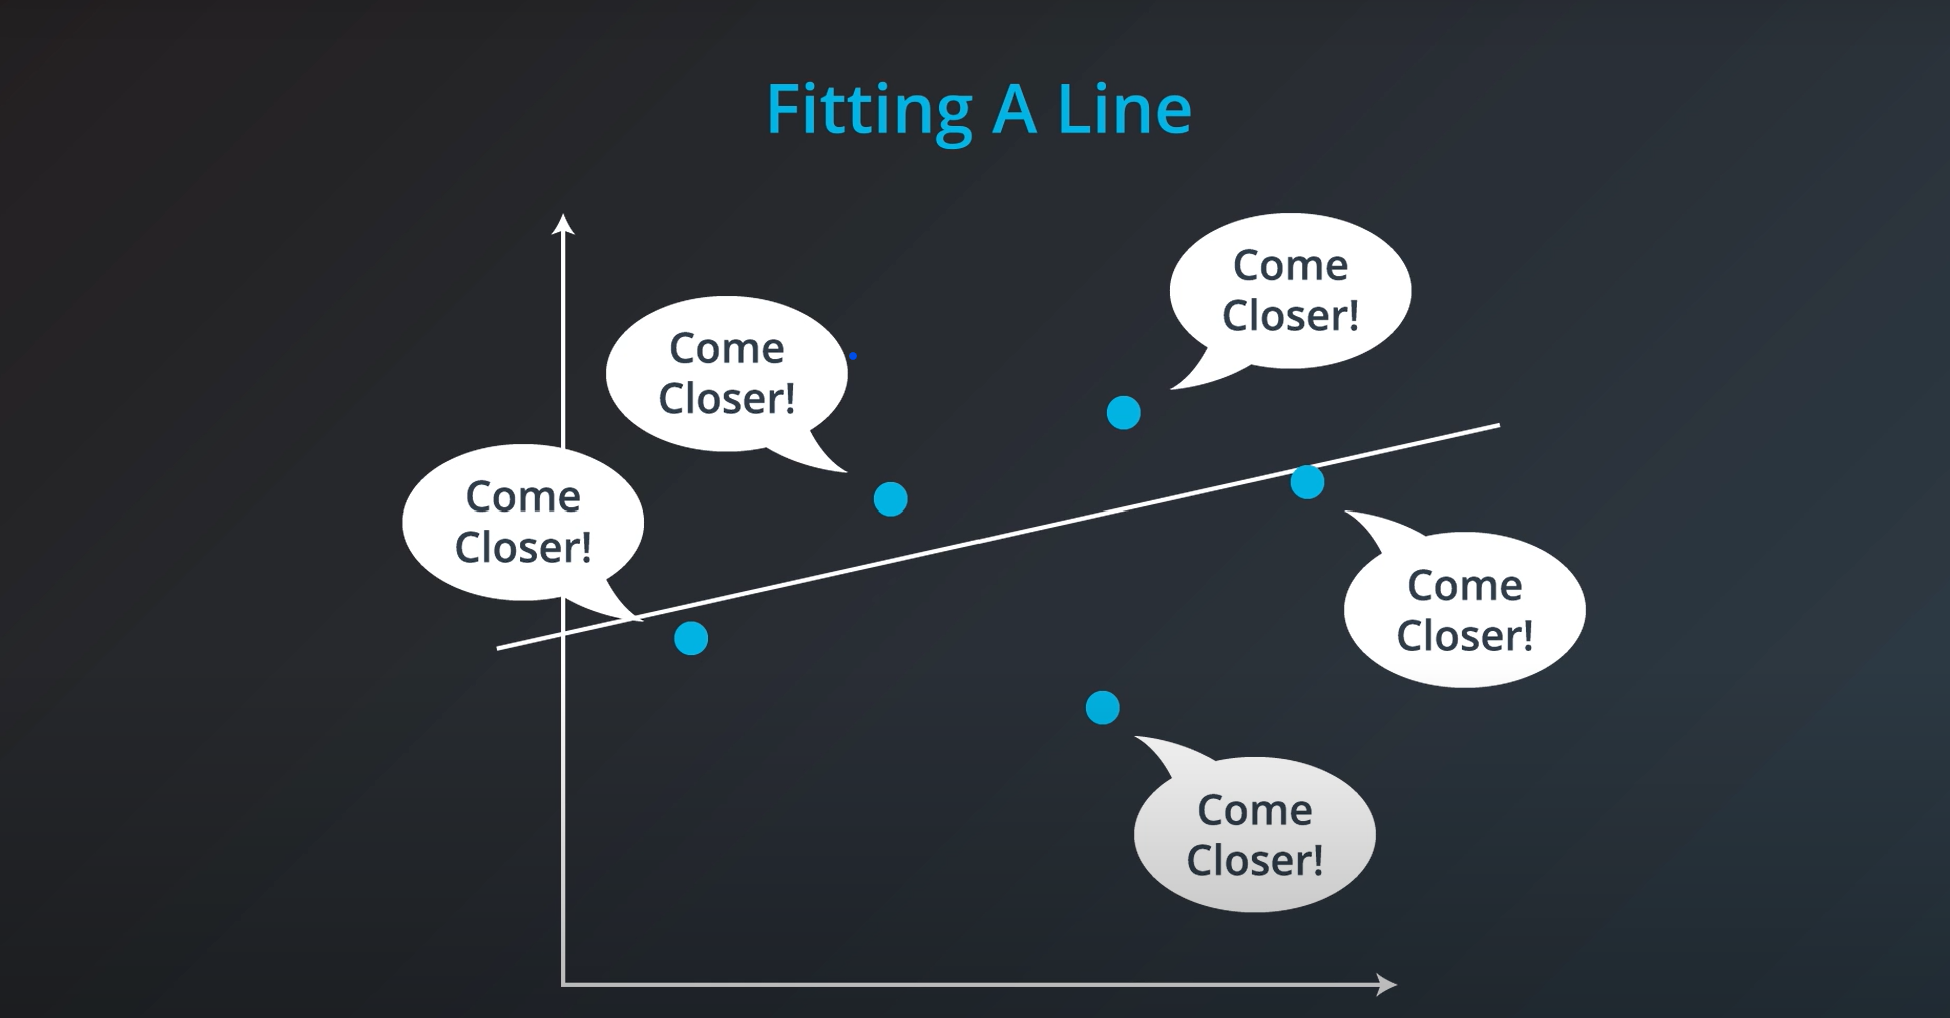


In this method, we will try to make line move closer to the data points. As the equation of line is given by $y = mx+c$,
for a single point $p$ having co-ordinates as $(p,q)$, and assuming $\alpha$ as learning rate, we can form an equation as follows:
$ y = (m+p$$\alpha$$)x + (c+$$\alpha$) This will increase the slope of line towards the point $p$ and also increase the y intercept.

Let's try to fit/move a line closer to the given point by an example.

### Problem Statement 1:
Let's say that we have a line whose equation is $y = -0.6x + 4$. For the point $(x,y)$ = (-5, 3), apply the absolute trick to get the new equation for the line, using a learning rate of $\alpha$ = 0.1.

Report your answer in the form $y = w_1x + w_2$, substituting appropriate values for $w_1$ and $w_2$.


In [23]:
x,y = -5,3
w1,w2 = -0.6, 4
α = 0.1
#applying the learning rate of α and x co-ordinate to the equation of line for absolute trick
new_w1 = round(w1-x*α,2) 
new_w2 = w2-0.1
print("new w1 value is {} and new w2 value is {} ".format(new_w1,new_w2))


new w1 value is -0.1 and new w2 value is 3.9 


Here when we calculate the value of y from given x value of the co-ordinate we get y =7. Then drawing the line on x-y plane we get something as below:

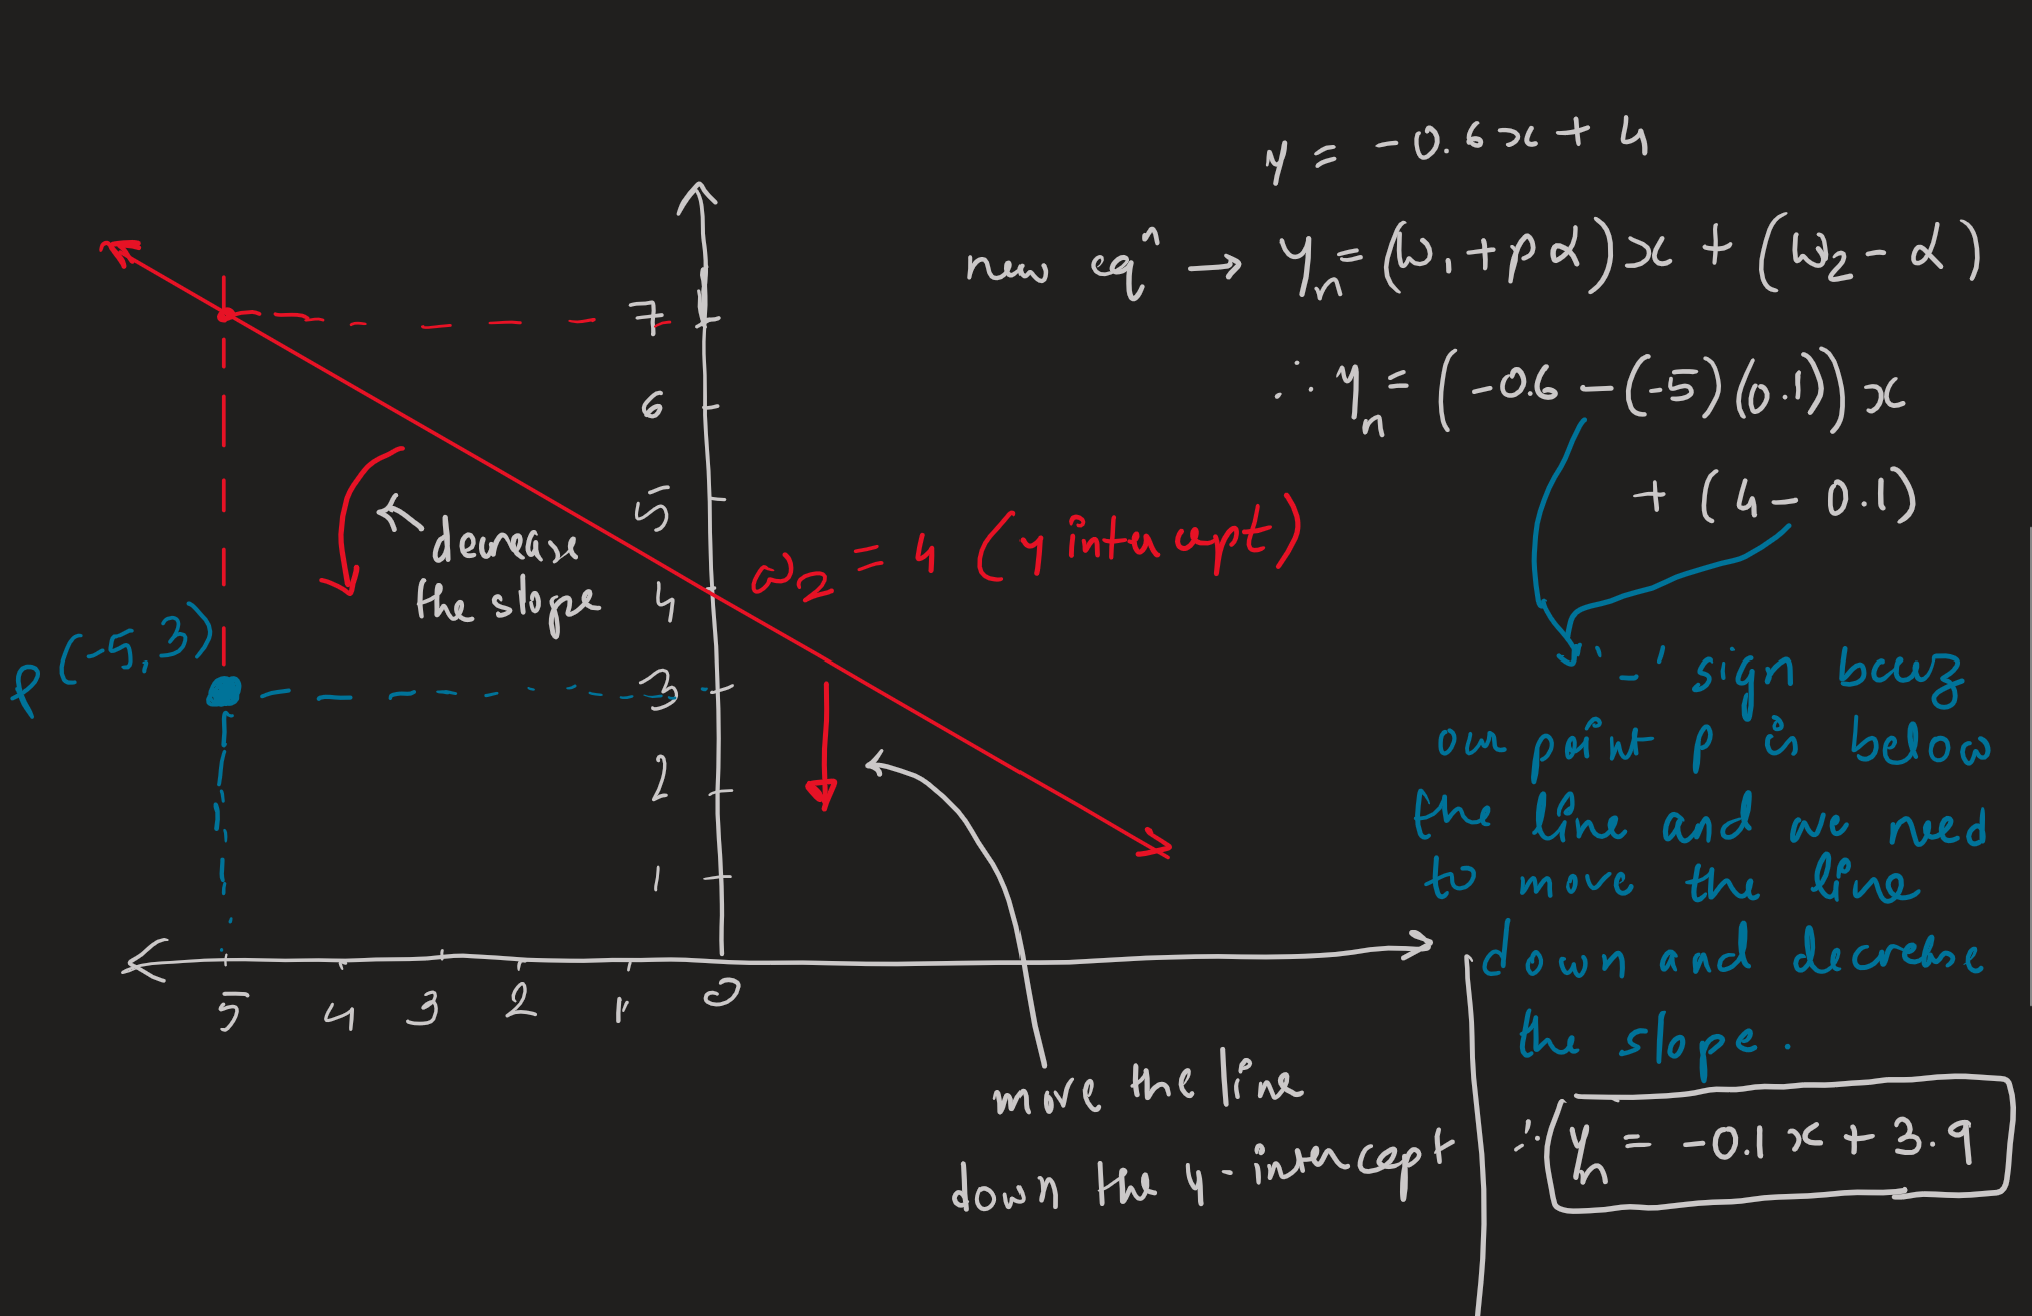

Hence, the new equation of line will be $y = -0.1x + 3.9$

## 2. Sqaure Trick:

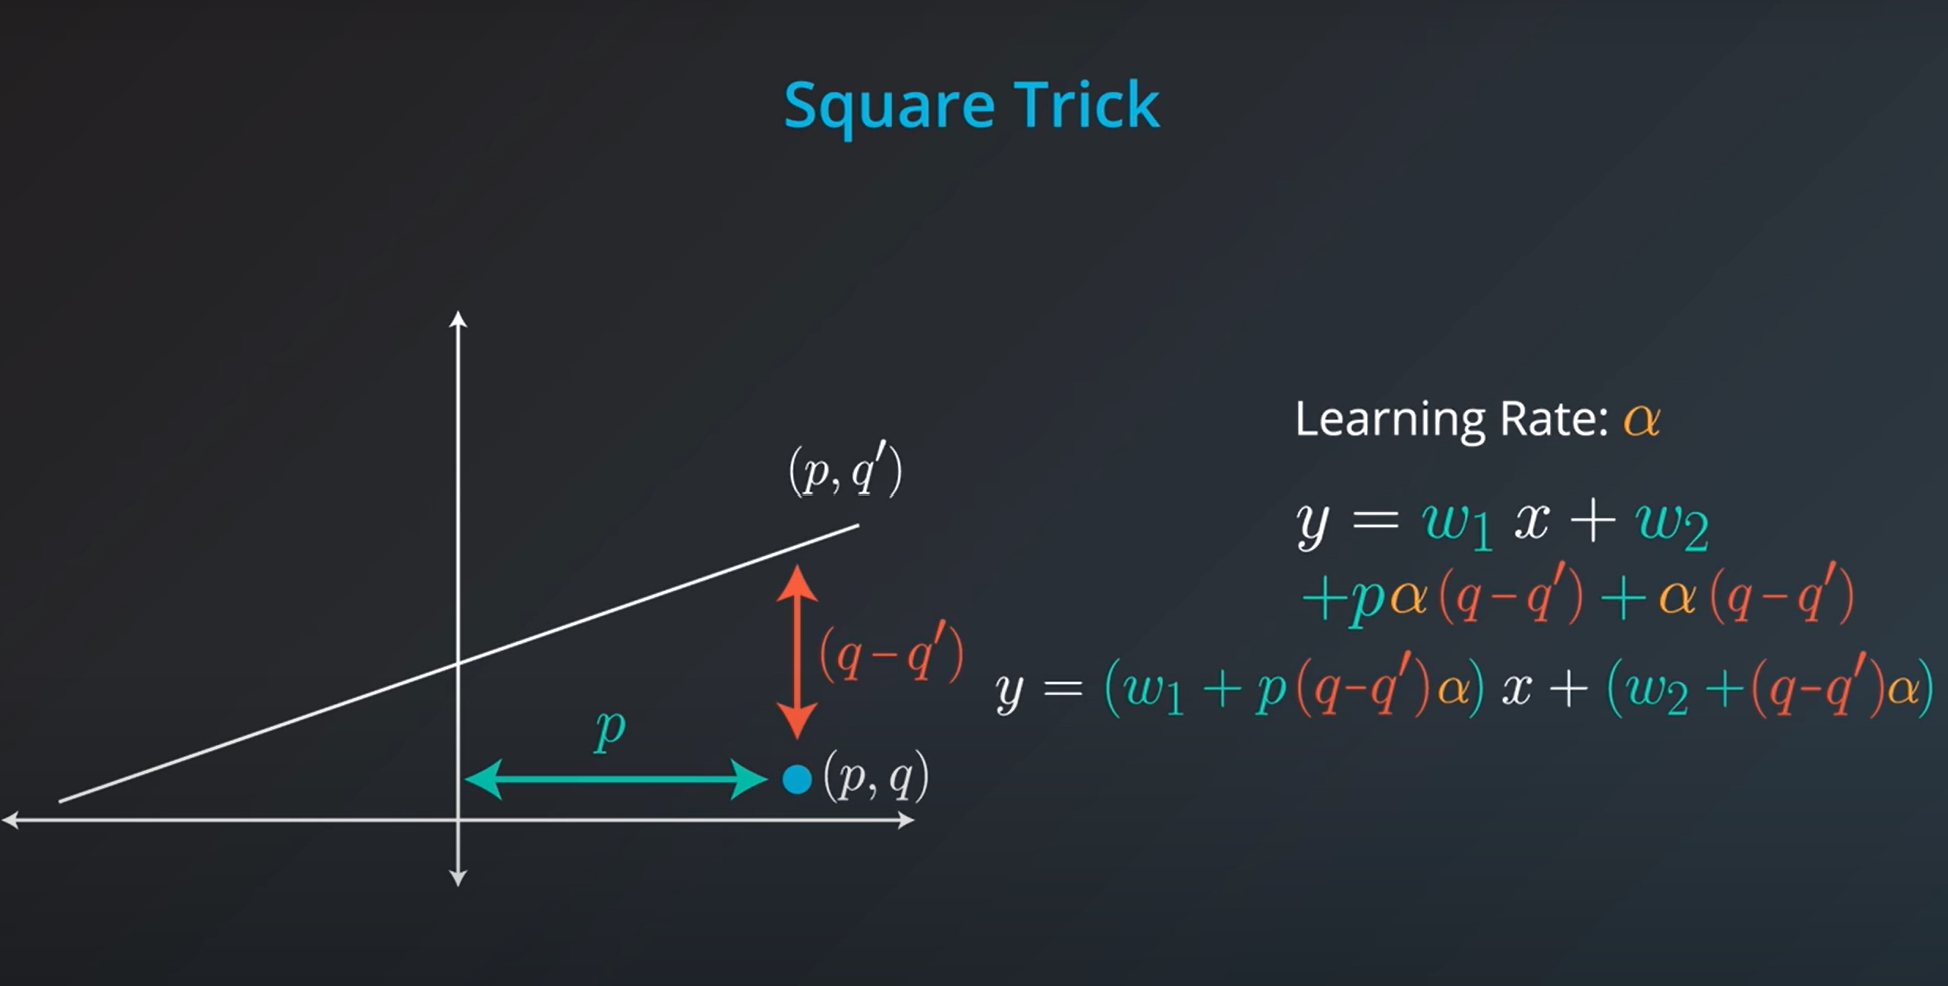


In this method, we are finding the distance between the two y points, one of the line and other of the data point to which we want to move the line closer to. This distance is used to determine the new slope and intercept for equation of shifted line.

### Problem Statement 2:

Let's say that we have a line whose equation is $y = -0.6x + 4$. For the point $(x,y)$ = $(-5, 3)$, apply the square trick to get the new equation for the line, using a learning rate of $\alpha$ = 0.01.

Report your answer in the form $y = w_1x + w_2$, substituting appropriate values for $w_1$ and $w_2$.

In [28]:
x1,y1 = -5,3
w1,w2 = -0.6, 4
α = 0.01
y2 = -0.6*x1 +4  #from equation of line y= -0.6x + 4 find the value of y
new_w1 = round(w1 - x1*(y2-y1)*α, 2) 
new_w2 = w2 - (y2-y1)*α
print("new w1 value is {} and new w2 value is {} ".format(new_w1,new_w2))

new w1 value is -0.4 and new w2 value is 3.96 


Hence the equation of shifted line now is $y = -0.4x + 3.96$.

## Gradient Descent

Now the question is till what point we can safely say that the predicted values are close the actual result. In reality, we can keep shifting the line to best match the location were the errors are minimum, this is determined by mean absolute error. However, after a certain point if we still keep shifting the line the errors start accumulating again. This process is explained in terms of Gradient Descent. Examine the below image to get an graphical idea. There is a good amount of calculus involved in determining the descent in successive steps and I am going to skip this part as it will be just another chapter.

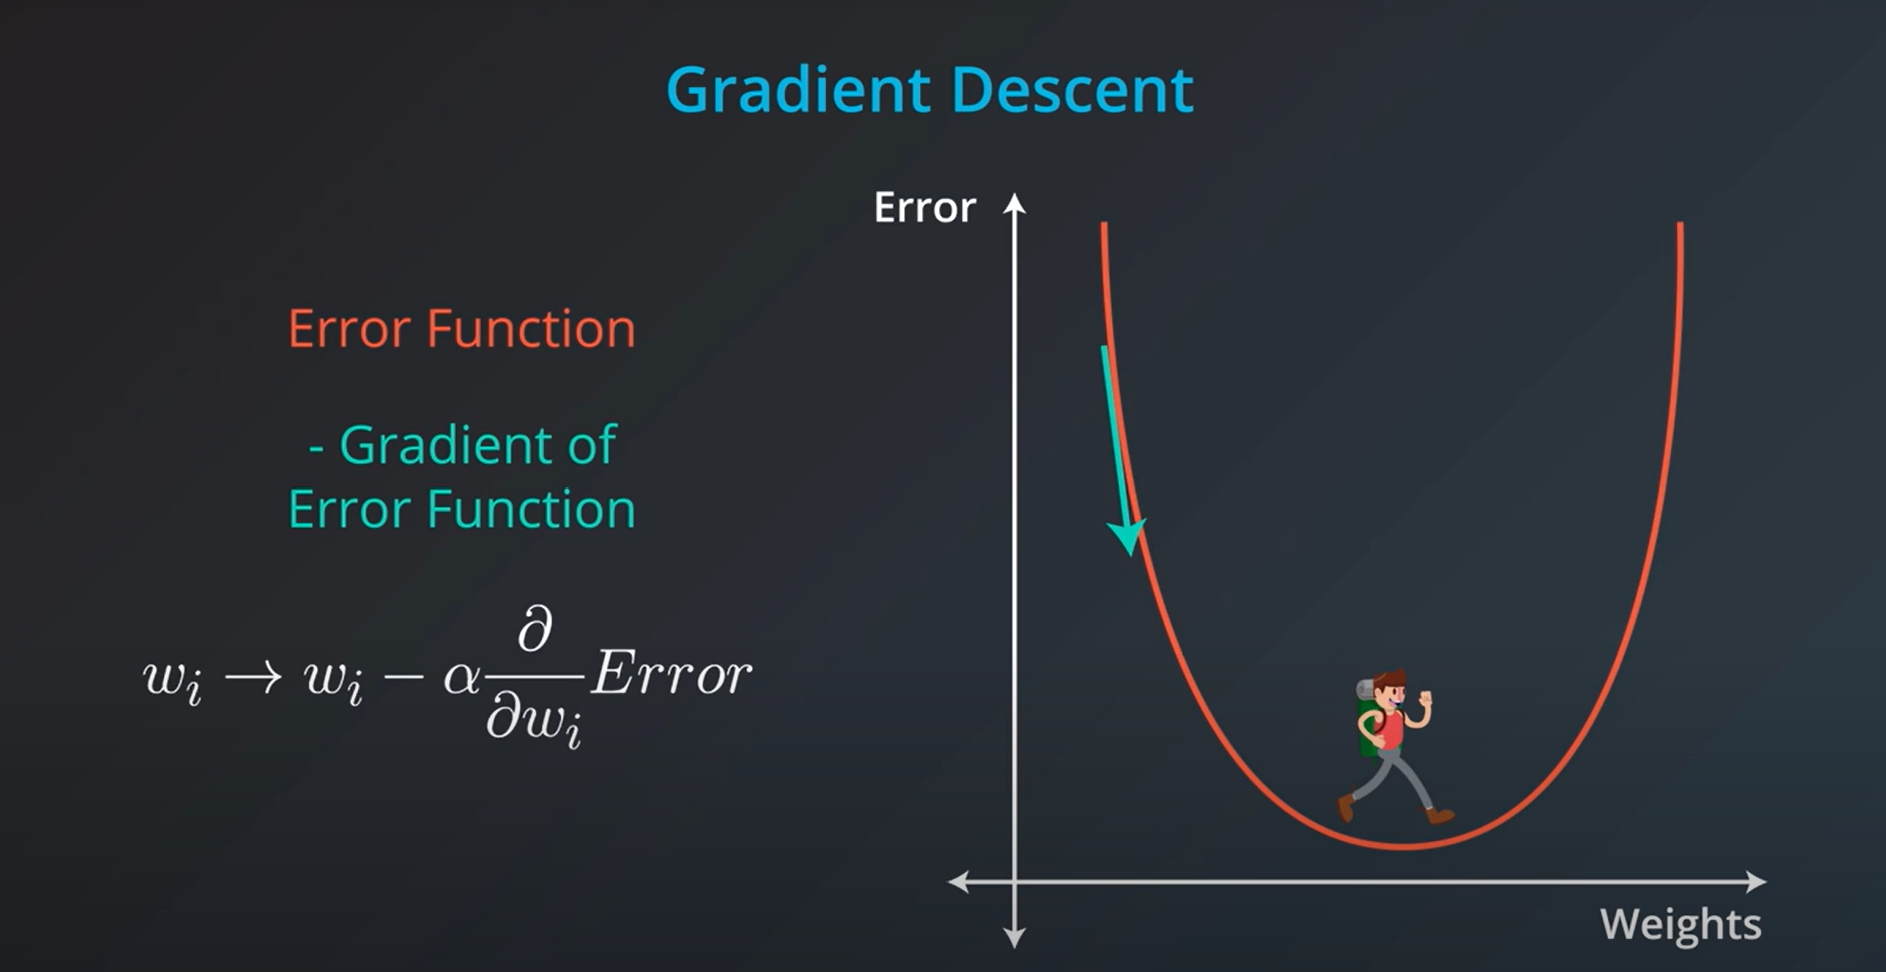

We will discuss two error functions, whose values will be used to determine at which of tje gradient descent out prediction lies or in other words how optimized is our model so the error is minimum between the predicted values to the actual values. Python comes with inbuilt packages like scikit learn and numpy to determine these error functions.

### Mean Absolute Error

**Mean absolute** error is basically the average of all errors. Errors here are the distance between the y co-ordinates of the line and our point of interest i.e |y-Y|. **$m$** here is number of the total errors calculated.

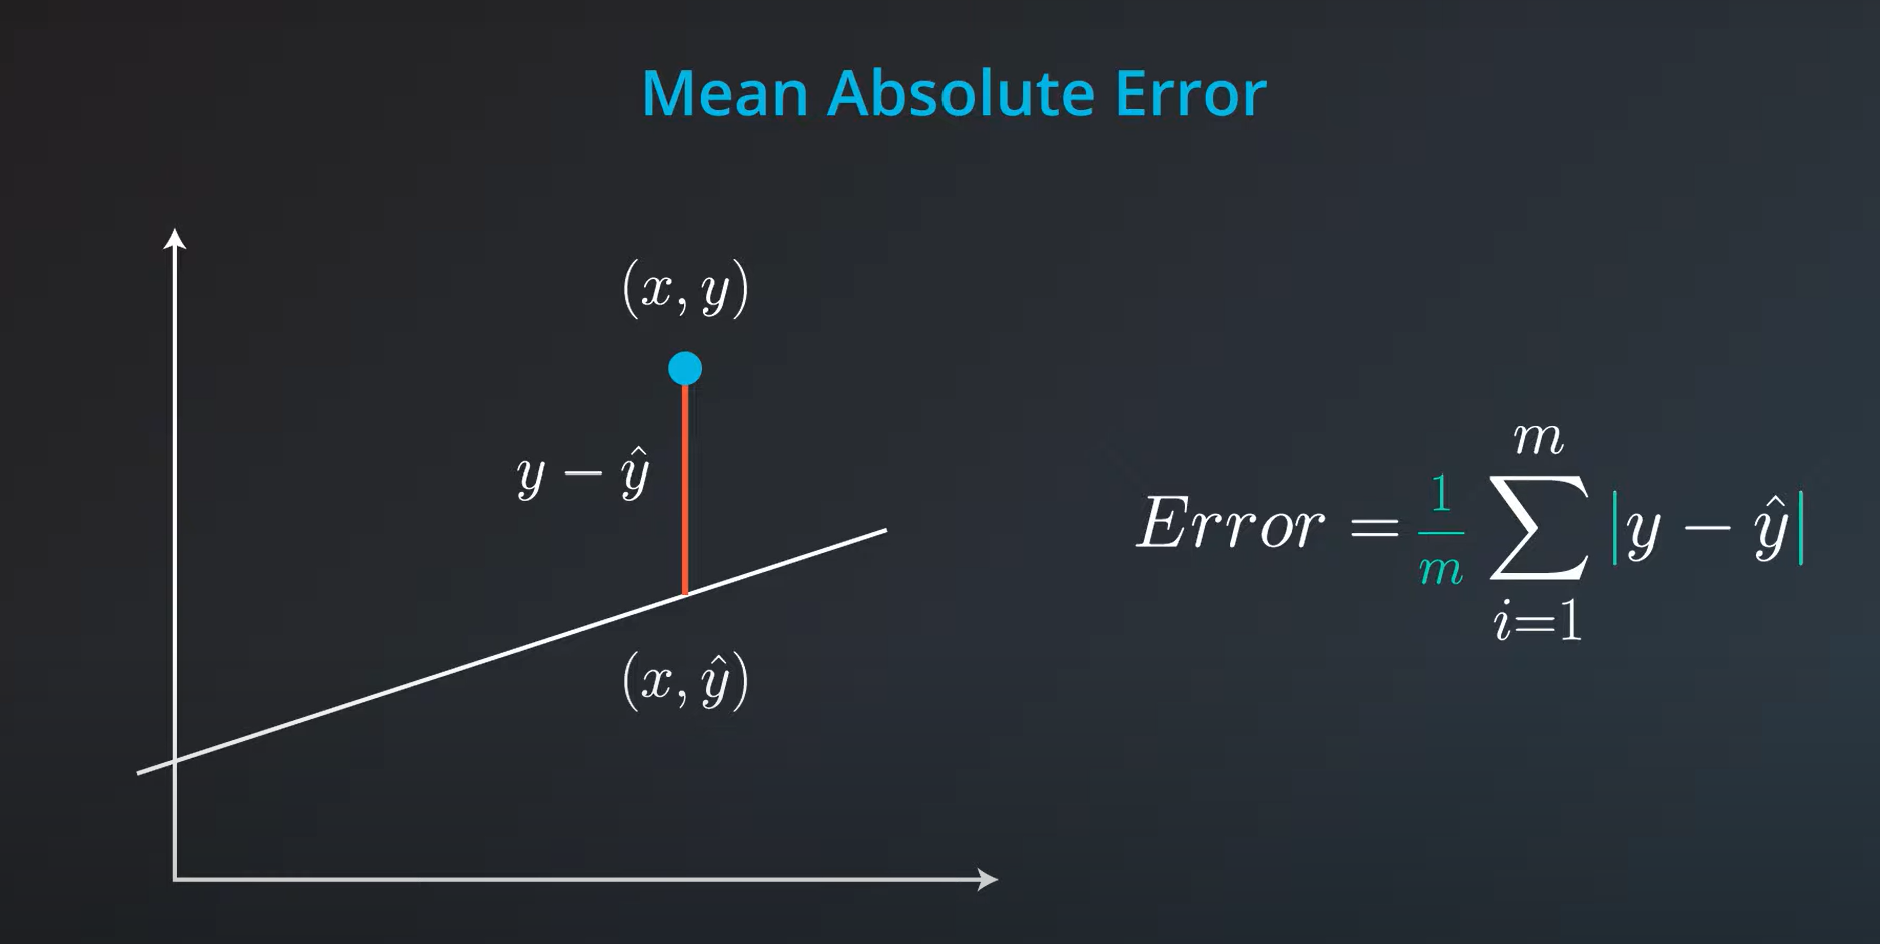

### Mean Squared Error

**Mean Squared Error** is the avergae of the sqaure of errors, which is basically the area formed by the linear error. The graphical representation given below shows the squared area of the error.

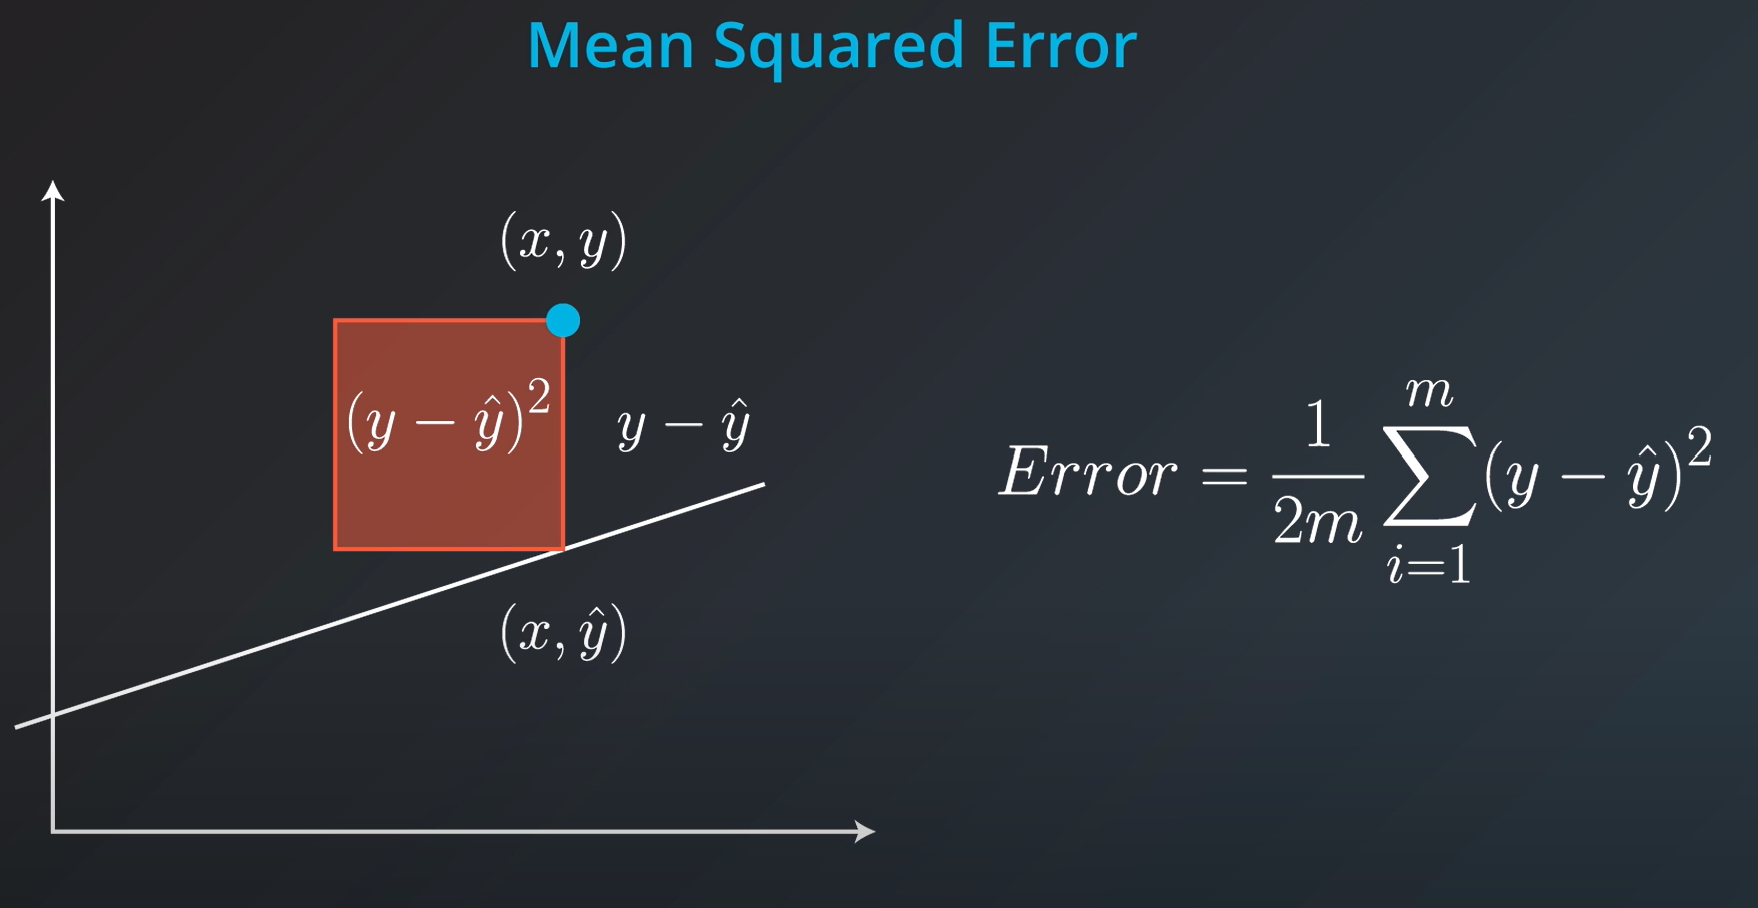

### Problem Statement 3:

Compute the **_mean absolute error_** and **_mean squared error_** for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)


In [47]:
x = [2,5,-4,-7,8]
# for the above X values find the values of Y 
y = [-2,6,-4,1,14]
Y = [(1.2 *num +2) for num in x]
error = 0
error2 = 0
for i in range(len(Y)):
    error  = error + abs(Y[i]-y[i])
    error2 = error2 + (Y[i]-y[i])**2
    
error2
mean_absolute_error = error/len(Y)
mean_squared_error = round(error2/(2*len(Y)),2)

print("Mean absolute error is {} and mean sqaured error is {}".format(mean_absolute_error,mean_squared_error ))



Mean absolute error is 3.88 and mean sqaured error is 10.69


### Mini-Batch Gradient Descent Quiz

### Problem Statement 4:

In this quiz, you'll be given the following sample dataset (as in data.csv), and your goal is to write a function that executes mini-batch gradient descent to find a best-fitting regression line. You might consider looking into numpy's matmul function for this!



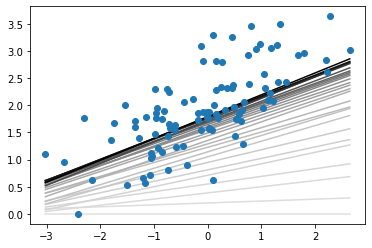

In [130]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(15)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
     # compute errors
    y_pred = np.matmul(X,W) + b
    error = y - y_pred
    
    # compute steps
    W_new  = W + np.matmul(error,X) * learn_rate
    b_new = b + error.sum()*learn_rate
    
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt(r'C:\Everything On This PC\Udacity\Intro to ML -TensorFlow\ \
    Linear Regression\Problem 4\data.txt', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()
    

As we can see in the above plot, we are gradually dscending our predicted line closer to data points indicated by light to darker shades of line. We carried out this gradient descent in mini batch of 20 rows of data. **Mini Batch Gradient Descent** gives more optimized results than **Stochastic** and **Batch Gradient Descent**. 

## Linear Regression with Scikit-Learn

### Problem Statement 5:
In this quiz, you'll be working with data on the average life expectancy at birth and the average BMI for males across the world. The data comes from Gapminder.<br>

The data file can be found under the _"bmi_and_life_expectancy.csv"_ tab in the quiz below. It includes three columns, containing the following data:<br>

**Country** – The country the person was born in. <br>
**Life expectancy** – The average life expectancy at birth for a person in that country. <br>
**BMI** – The mean BMI of males in that country.<br>

You'll need to complete each of the following steps:<br>

__1. Load the data__<br>

The data is in the file called _"bmi_and_life_expectancy.csv"_.<br>
Use pandas read_csv to load the data into a dataframe (don't forget to import pandas!)<br>
Assign the dataframe to the variable _bmi_life_data_.<br>

__2. Build a linear regression model__<br>

Create a regression model using scikit-learn's LinearRegression and assign it to _bmi_life_model_.<br>
Fit the model to the data.<br>

__3. Predict using the model__<br>

Predict using a BMI of 21.07931 and assign it to the variable _laos_life_exp_.<br>

**NOTE** : Here Udacity has provided the csv file in form of text. For our purpose, since we will be using pandas to read csv file we will convert the text file data to csv format in excel. To do this, copy all the data and paste it to an excel file and save the file with '.csv' extension. Now, since this data is separated by ',' we can separate this text into differnt columns in excel.

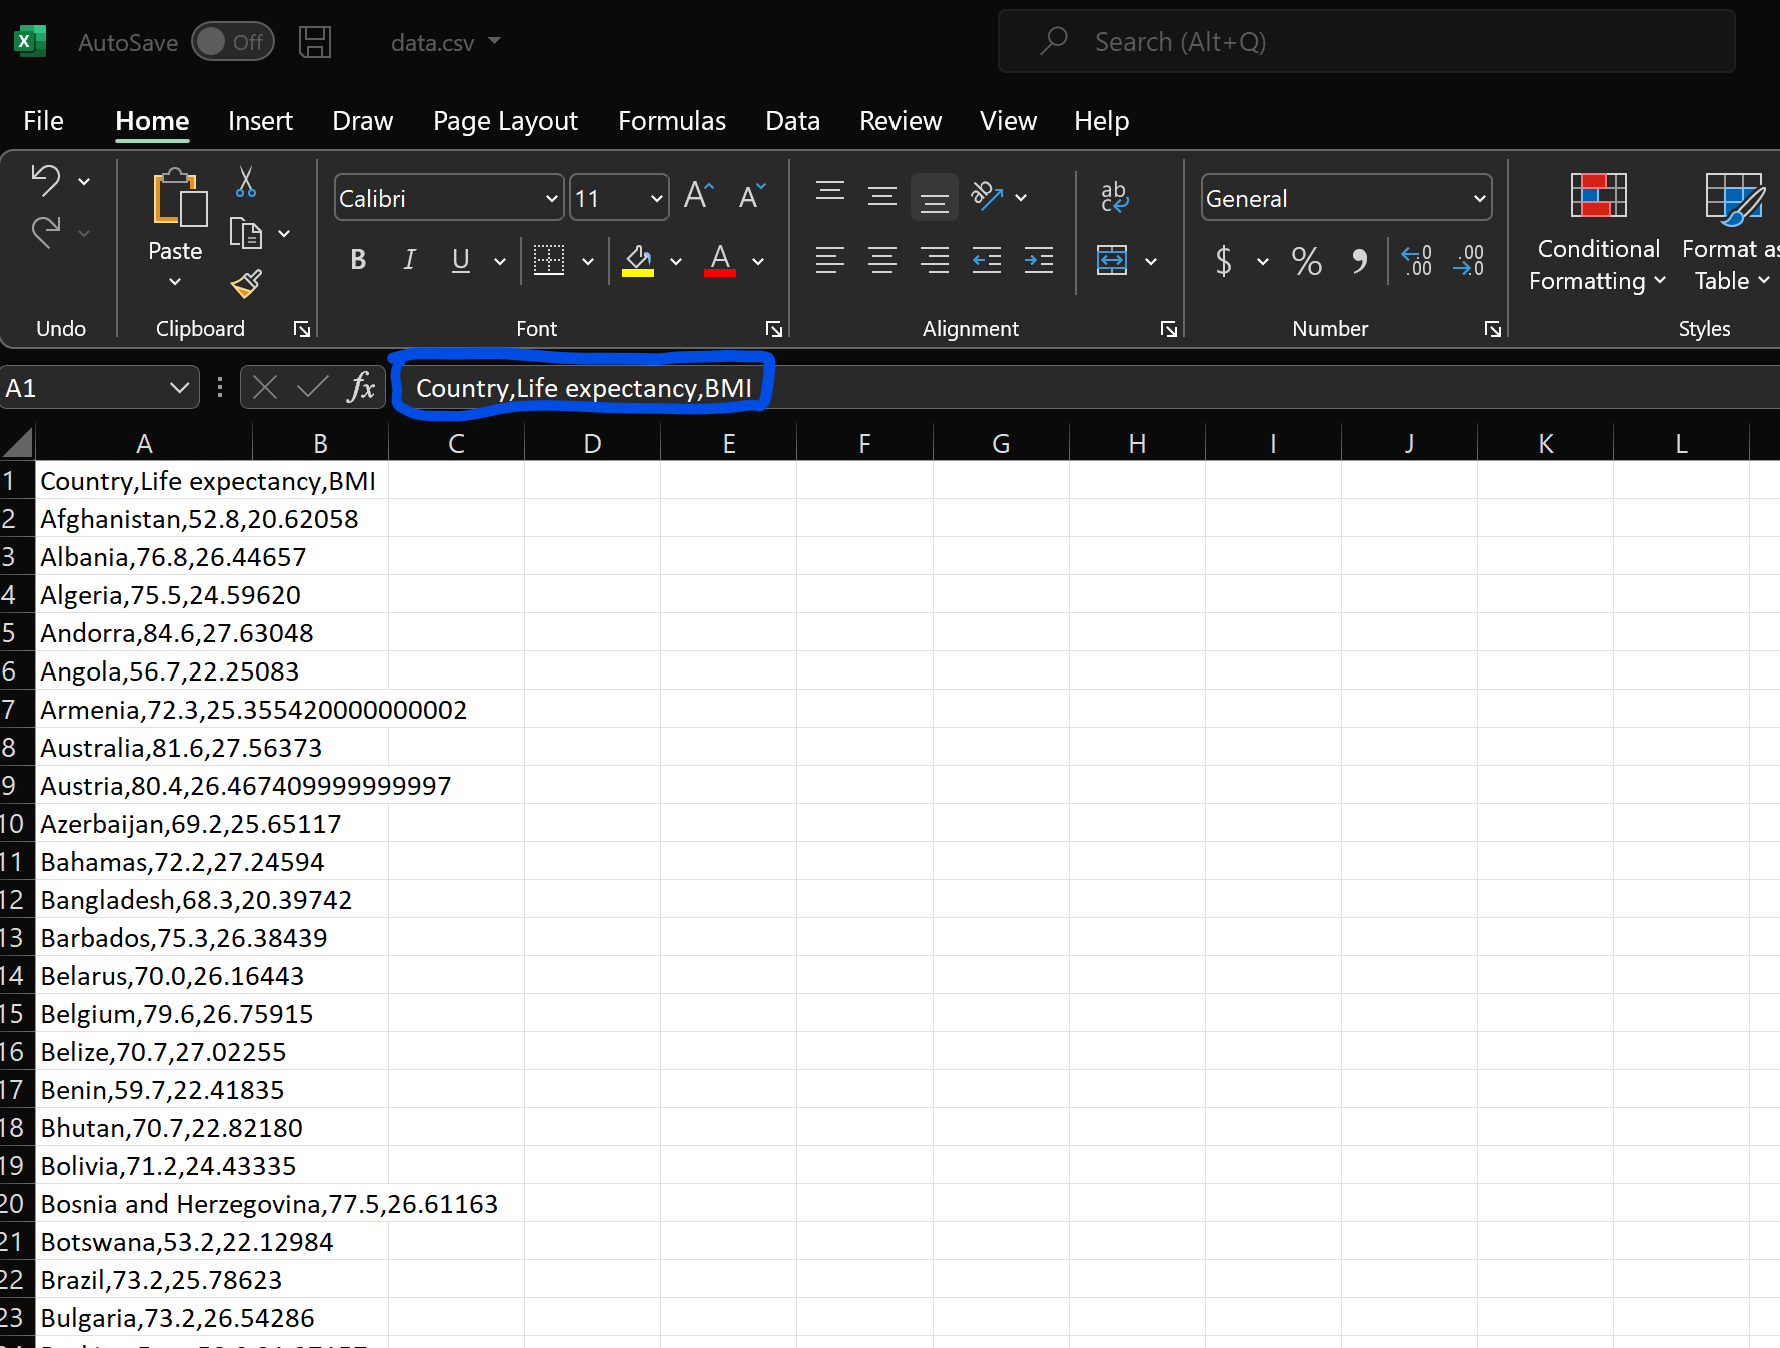

Select the first column, then Click on **Data** tab and click on **Text to Columns** button.

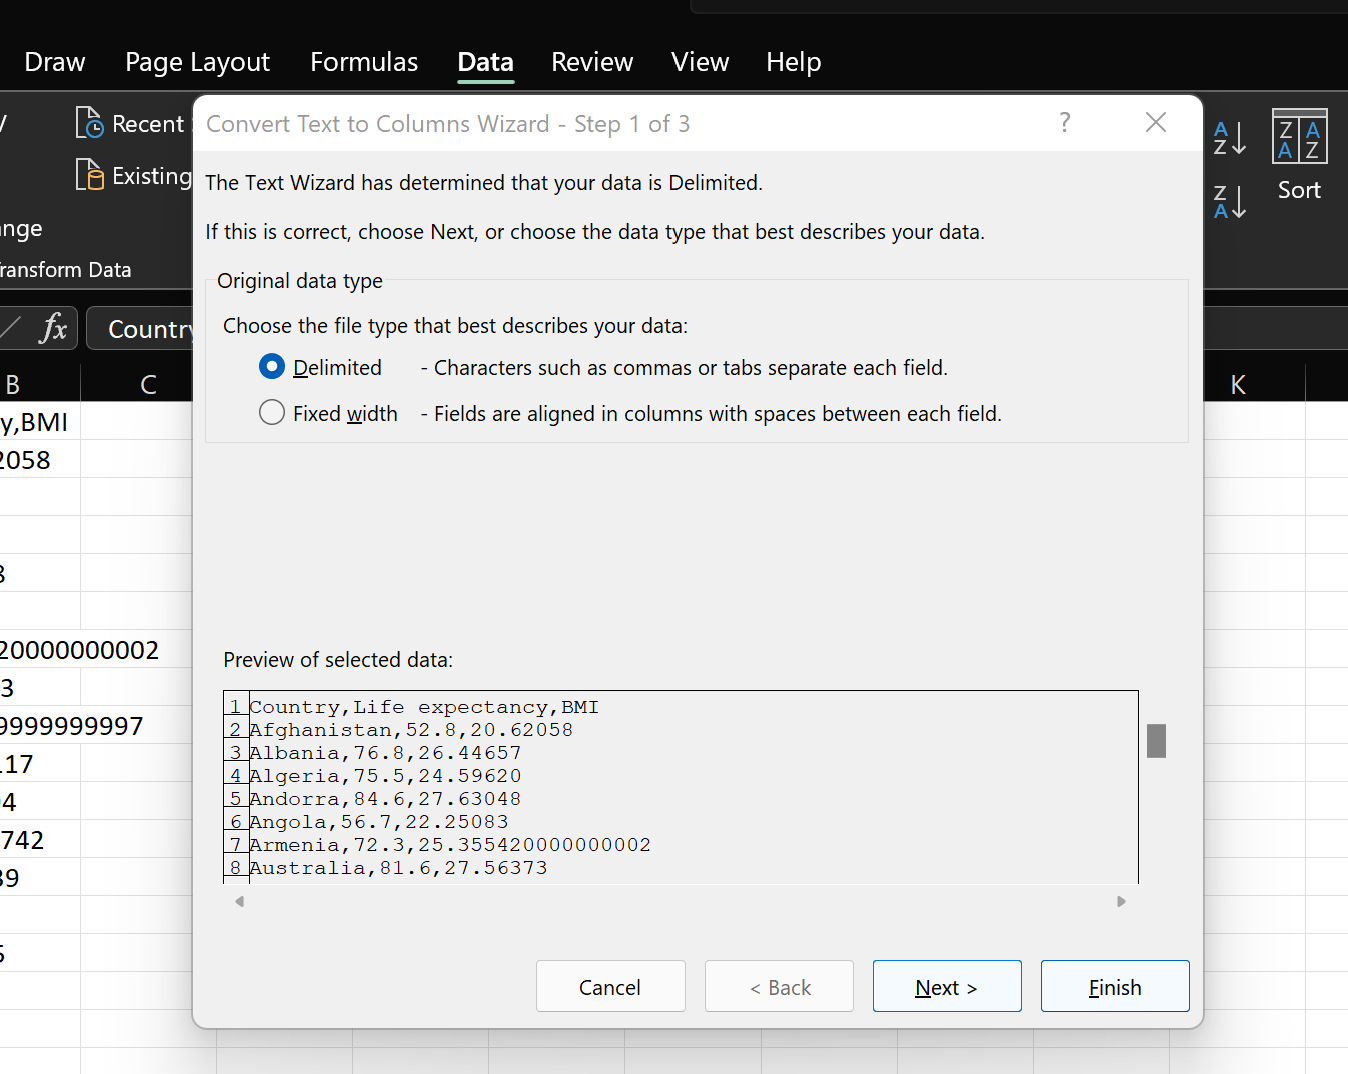

Next, select **Delimited** and then clicking on next, select ',' as delimiter and click finish.

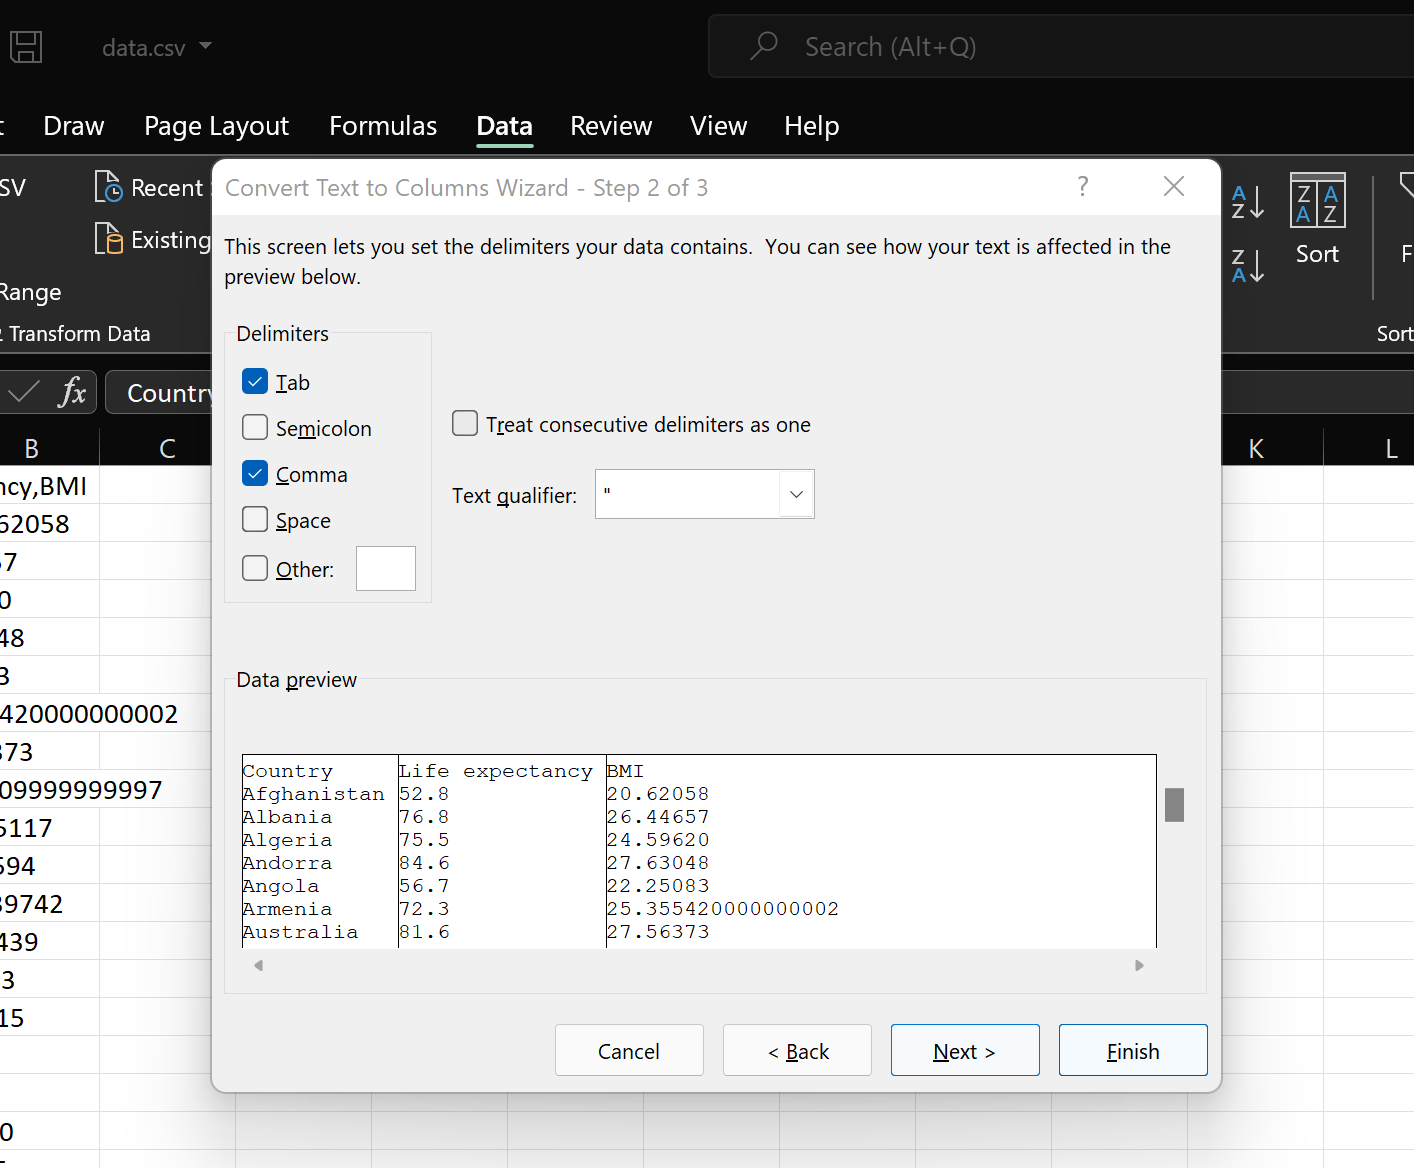

In [9]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv(r"C:\Everything On This PC\Udacity\Intro to ML -TensorFlow\ \
Linear Regression\Problem 5\bmi_and_life_expectancy.csv", sep = ',')

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()

X_features = bmi_life_data['BMI'].values.reshape(-1,1)  # features used to predict the life expectancy, here BMI
y_pred = bmi_life_data['Life expectancy'] #output or feature to be predicted 
bmi_life_model.fit(X_features,y_pred)

# Make a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
print(laos_life_exp)


[60.31564716]


## Polynomial Regression

### Problem Statement 7:

Get some practice implementing polynomial regression in this exercise. In data.csv, you can see data generated for one predictor feature ('Var_X') and one outcome feature ('Var_Y'), following a non-linear trend. Use sklearn's PolynomialFeatures class to extend the predictor feature column into multiple columns with polynomial features. Play around with different degrees of polynomial and the Test Run button to see what fits best: when you think you have the best-fitting degree, press the Submit button to check your work!

Perform the following steps below:<br>

**1. Load in the data**<br>

The data is in the file called 'data.csv'. Note that this data has a header line.<br>
Make sure that you've split out the data into the predictor feature in $X$ and outcome feature in $y$.<br>
For $X$, make sure it is in a 2-d array of 20 rows by 1 column. You might need to use NumPy's _reshape_ function to accomplish this.<br>

**2. Create polynomial features**<br>

Create an instance of sklearn's PolynomialFeatures class and assign it to the variable _poly_feat_. Pay attention to how to set the degree of features, since that will be how the exercise is evaluated.<br>
Create the polynomial features by using the **_PolynomialFeatures_** object's **_.fit_transform()_** method. The "fit" side of the method considers how many features are needed in the output, and the "transform" side applies those considerations to the data provided to the method as an argument. Assign the new feature matrix to the **X_poly** variable.<br>

**3. Build a polynomial regression model**<br>

Create a polynomial regression model by combining sklearn's LinearRegression class with the polynomial features. Assign the fit model to poly_model.<br>

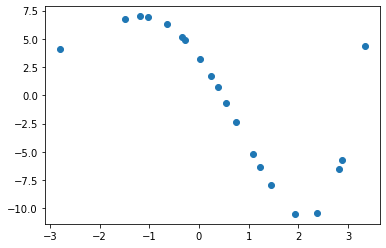

In [194]:
# TODO: Add import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv(r'C:\Everything On This PC\Udacity\Intro to ML -TensorFlow\ \
Linear Regression\Problem 7\data.csv')
X = train_data['Var_X'].values.reshape(-1,1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features

poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)
plt.scatter(X, poly_model.predict(X_poly))

## Regularization

Regularization is another form of regression where the coefficients are reduced to move towards zero. It's an important technique to improve the models by reducing errors and to make sure they don't overfit. There are two types of regularization discussed here: 
### 1. L1 Regularization: 
In this model, the absolute value of the magnitude of coefficeints are added to calculate the error. This model is called Least Absolute Shrinkage and Selection Operator (LASSO) regression.

### 2. L2 Regularization
In this model, the squared magnitude of the coefficeints are added to the calculate the error. This model is called Ridge regression.

### Problem Statement 8:

In this assignment's data.csv, you'll find data for a bunch of points including six predictor variables and one outcome variable. Use sklearn's Lasso class to fit a linear regression model to the data, while also using **L1 regularization** to control for model complexity.<br>

Perform the following steps:<br>

**1. Load in the data**<br>

The data is in the file called __'data.csv'__. Note that there's no header row on this file.<br>
Split the data so that the six predictor features (first six columns) are stored in $X$, and the outcome feature (last column) is stored in $y$.<br>

**2. Fit data using linear regression with Lasso regularization**<br>

Create an instance of sklearn's _Lasso class_ and assign it to the variable lasso_reg. You don't need to set any parameter values: use the default values for the quiz.<br>
Use the Lasso object's _.fit()_ method to fit the regression model onto the data.<br>

**3. Inspect the coefficients of the regression model**<br>

Obtain the coefficients of the fit regression model using the _.coef__ attribute of the Lasso object. Store this in the _reg_coef_ variable: the coefficients will be printed out, and you will use your observations to answer the question at the bottom of the page.<br>


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv(r'C:\Everything On This PC\Udacity\Intro to ML -TensorFlow\ \
Linear Regression\Problem 8\data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X,y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_ceof = lasso_reg.coef_

print(reg_ceof)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


Here, we can see from above result that Column 1 and Column 6 out of all the predictor features have coefficients zeroed by Lasso Regularization.

### Feature Scaling

Feature scaling is a technique to standardize the features in a fixed range. This can be achieved by Standardizing or Normalizing. Feature scaling is aslo used in regularization model to avoid errors in the result that can arise if a range of one data is too small comapared to other. 

### Problem Statement 9:

Previously, you saw how regularization will remove features from a model (by setting their coefficients to zero) if the penalty for removing them is small. In this exercise, you'll revisit the same dataset as before and see how scaling the features changes which features are favored in a regularization step. The only thing different for this quiz compared to the previous one is the addition of a new step after loading the data, where you will use sklearn's StandardScaler to standardize the data before you fit a linear regression model to the data with L1 (Lasso) regularization.

Perform the following steps: <br>

**1. Load in the data**<br>

The data is in the file called 'data.csv'. Note that there's no header row on this file.<br><br>
Split the data so that the six predictor features (first six columns) are stored in X, and the outcome feature (last column) is stored in y.<br>

**2. (NEW) Perform feature scaling on data via standardization**<br>

Create an instance of sklearn's StandardScaler and assign it to the variable scaler.<br>
Compute the scaling parameters by using the .fit_transform() method on the predictor feature array, which also returns the predictor variables in their standardized values. Store those standardized values in X_scaled.<br>

**3. Fit data using linear regression with Lasso regularization**<br>


Create an instance of sklearn's Lasso class and assign it to the variable lasso_reg. You don't need to set any parameter values: use the default values for the quiz.<br>
Use the Lasso object's .fit() method to fit the regression model onto the data. Make sure that you apply the fit to the standardized data from the previous step (X_scaled), not the original data.<br>

**4. Inspect the coefficients of the regression model**<br>

Obtain the coefficients of the fit regression model using the .coef_ attribute of the Lasso object. Store this in the reg_coef variable: the coefficients will be printed out, and you will use your observations to answer the question at the bottom of the page.<br>

In [3]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv(r'C:\Everything On This PC\Udacity\Intro to ML -TensorFlow\
Linear Regression\Problem 8\data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the standardization scaling object.
scaler_std = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler_std.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


Here, we can see from above result that Column 1 and Column 4 of all the predictor features have coefficients zeroed by Lasso Regularization after applying feature scaling method of Standardizing.

## Summary:

In this chapter of Linear regression, we learned:

1. To perform fitting of a line on data set through Absolute and Square trick
2. How to minimize the error and optimize linear models by using Gradient Descent methods
3. Learned to perform Polynomial Regression on variables that are not linear
4. Learned the technique of Regularization so avoid model from overfitting
5. Performed feature Scaling on regularized model and its importance.


## Resources

Images and problem statement are taken from Udacity's Nanodegree program on Intro to ML- TensorFlow. 
https://www.udacity.com/course/intro-to-machine-learning-with-tensorflow-nanodegree--nd230

